In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import yaml

from distfit import get_distribution #This function takes a dataset of fit coefficents and returns a scipy statistical distribution

# Load the model coefficients

In [2]:
suffix='_model_221112'
with open(f'data/model/Model_Coefficients{suffix}.yaml',mode='rt') as f:
    ds_model=xr.Dataset.from_dict(yaml.safe_load(f))
ds_model

<xarray.Dataset>
Dimensions:             (coeff: 3, variable: 5, parameter: 3, term: 2)
Coordinates:
  * coeff               (coeff) <U9 'gamma^2' 'gamma' 'Intercept'
    distribution        (variable) <U10 'genextreme' ... 'genextreme'
  * parameter           (parameter) <U5 'loc' 'scale' 'shape'
  * term                (term) <U5 'const' 'x1'
  * variable            (variable) <U8 'HmHs' 'Hmax' 'Hs' 'Tz' 'r_sample'
Data variables: (12/24)
    0.025               (variable, parameter, term, coeff) float64 0.001109 ....
    0.975               (variable, parameter, term, coeff) float64 0.001511 ....
    AIC                 (variable, parameter, term) float64 -159.5 ... -99.33
    Adj. R-squared      (variable, parameter, term) float64 0.998 ... 0.575
    BIC                 (variable, parameter, term) float64 -157.2 ... -97.01
    Coef.               (variable, parameter, term, coeff) float64 0.00131 .....
    ...                  ...
    Std.Err.            (variable, parameter, term, coeff) float64 9.303e-05 ...
    equation            (variable, parameter) <U49 '$loc$ = x1.$(\\logN)^{0.6...
    t                   (variable, parameter, term, coeff) float64 14.08 ... ...
    xpow                (variable, parameter) float64 0.6667 1.0 0.5 ... 1.0 1.0
    xtran               (variable, parameter) <U4 'log' 'noop' ... 'log' 'log'
    ytran               (variable, parameter) <U4 'noop' 'noop' ... 'log' 'log'

# Get some model distributions for given Gamma and Number of Waves
# Scale by Hs and Tp

See https://docs.scipy.org/doc/scipy/tutorial/stats.html

The most interesting methods are: 
1. pdf (Probability Density Function), 
2. cdf (Cumulative Distribution Function)
3. ppf (Percentile Point Function)

See https://docs.scipy.org/doc/scipy/tutorial/stats.html#common-methods

In [3]:
Hs = 4.0
Tp = 12.
gamma = 3.3
Duration = 10 #minutes
n_waves = Duration*60/Tp
distn = get_distribution(ds_model,v='Hs',gamma=gamma,N=n_waves)
display(distn) # This is a scipy 'frozen' distribution - i.e. an instance with specific parameters

Text(0.5, 0, 'Hs')

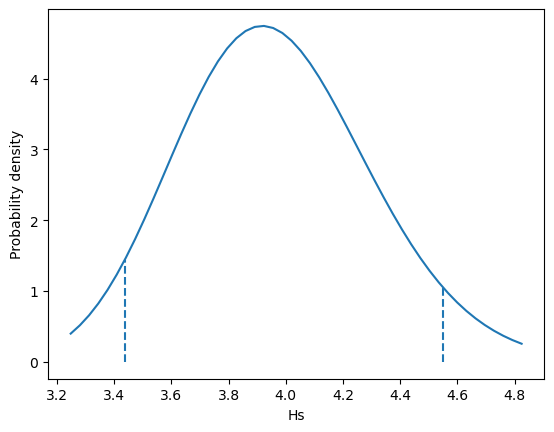

In [4]:
# The pdf can be evaluated at number of points and scaled by Hs
h_norm = np.linspace(distn.ppf(0.01),distn.ppf(0.99))
P = distn.pdf(h_norm)
# Get particular percentiles from the ppf function
pct_norm = distn.ppf([0.05, 0.95])
pct_dens = distn.pdf(pct_norm)

# Everything is scaled by unit variance, so scale the waveheight
h = h_norm*Hs
pct = pct_norm*Hs

# Make a plot
plt.plot(h,P)
plt.vlines(pct,ymin=0,ymax=pct_dens,ls='--')
plt.ylabel('Probability density')
plt.xlabel('Hs')

# Zero crossing period

Text(0.5, 0, 'Tz')

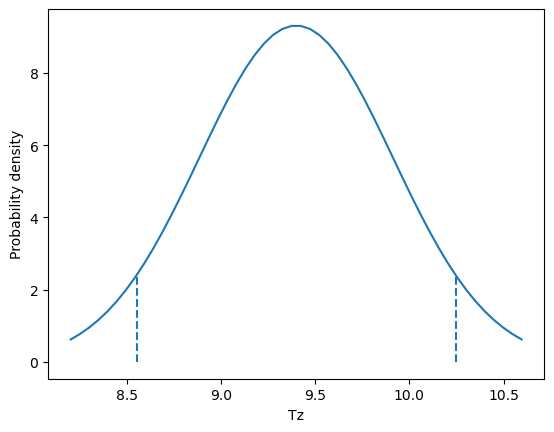

In [5]:
distn = get_distribution(ds_model,v='Tz',gamma=gamma,N=n_waves)

# The pdf can be evaluated at number of points and scaled by Tp
T_norm = np.linspace(distn.ppf(0.01),distn.ppf(0.99))
P = distn.pdf(T_norm)
# Get particular percentiles from the ppf function
pct_norm = distn.ppf([0.05, 0.95])
pct_dens = distn.pdf(pct_norm)

# Everything is scaled by unit variance, so scale the waveheight
Tz = T_norm*Tp
pct = pct_norm*Tp

# Make a plot
plt.plot(Tz,P)
plt.vlines(pct,ymin=0,ymax=pct_dens,ls='--')
plt.ylabel('Probability density')
plt.xlabel('Tz')

# Expected maximum wave height


Text(0.5, 0, 'Hmax')

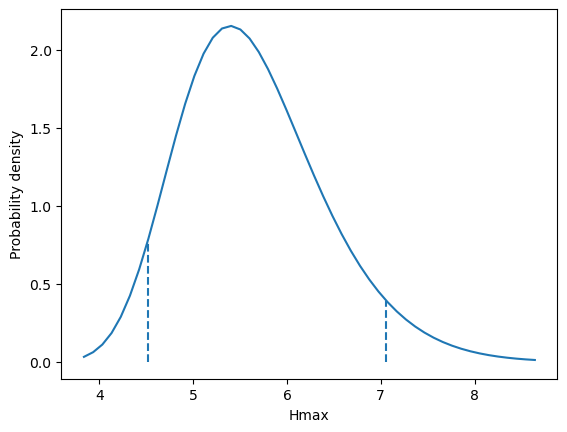

In [6]:
distn = get_distribution(ds_model,v='Hmax',gamma=gamma,N=n_waves)

# The pdf can be evaluated at number of points and scaled by Hs
h_norm = np.linspace(distn.ppf(0.001),distn.ppf(0.999))
P = distn.pdf(h_norm)
# Get particular percentiles from the ppf function
pct_norm = distn.ppf([0.05, 0.95])
pct_dens = distn.pdf(pct_norm)

# Everything is scaled by unit variance, so scale the waveheight
h = h_norm*Hs
pct = pct_norm*Hs

# Make a plot
plt.plot(h,P)
plt.vlines(pct,ymin=0,ymax=pct_dens,ls='--')
plt.ylabel('Probability density')
plt.xlabel('Hmax')
